In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick 


In [5]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [6]:
import csv

df  =  pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [7]:
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [8]:
df = df.drop(['CustomerID'], axis=1)
df.head(10)

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,Customer_2,62,Female,New York,1,48.76,172,0
2,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,Customer_4,36,Female,Miami,3,97.94,297,1
4,Customer_5,46,Female,Miami,19,58.14,266,0
5,Customer_6,67,Male,New York,15,82.65,456,1
6,Customer_7,30,Female,Chicago,3,73.79,269,0
7,Customer_8,67,Female,Miami,1,97.70,396,1
8,Customer_9,20,Female,Miami,10,42.45,150,1
9,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [9]:
df  = df.drop(['Name'], axis=1)
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [11]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [12]:
df.dtypes

Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [13]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Subscription_Length_Months'}>],
       [<Axes: title={'center': 'Monthly_Bill'}>,
        <Axes: title={'center': 'Total_Usage_GB'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

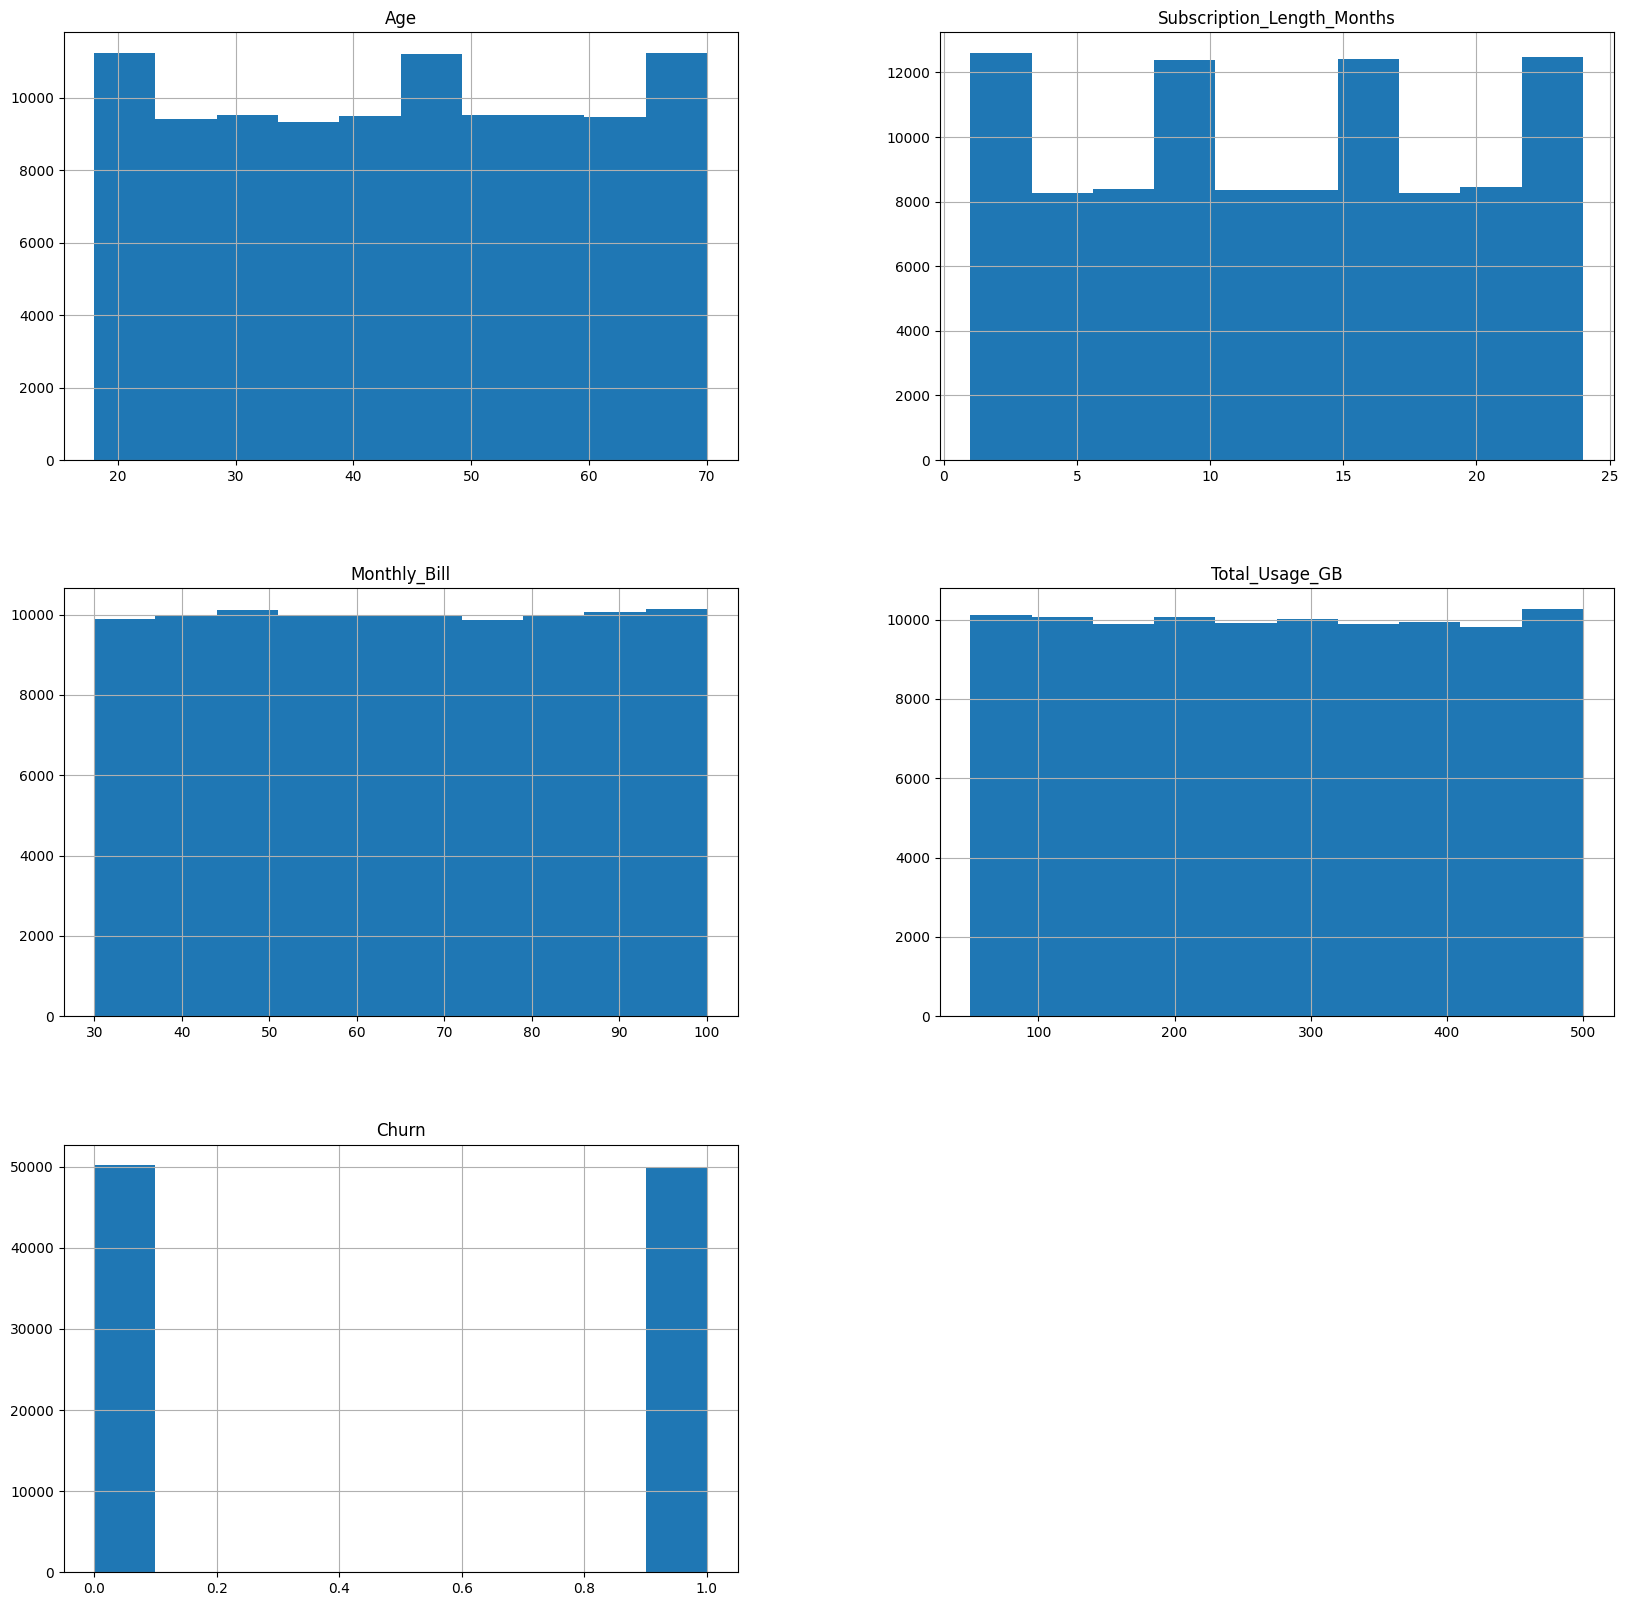

In [14]:
df.hist(figsize=(20,20))



In [15]:

print("Before Encoding",df['Location'].unique())



Before Encoding ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [16]:

label = LabelEncoder()
df['Location'] = label.fit_transform(df['Location'])
print("After Encoding",df['Location'].unique())



After Encoding [2 4 3 0 1]


In [17]:


print("Before Encoding",df['Gender'].unique())



Before Encoding ['Male' 'Female']


In [18]:

label = LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
print("After Encoding",df['Gender'].unique())



After Encoding [1 0]


In [19]:
df.head(10)

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
5,67,1,4,15,82.65,456,1
6,30,0,0,3,73.79,269,0
7,67,0,3,1,97.70,396,1
8,20,0,3,10,42.45,150,1
9,53,0,2,12,64.49,383,1


In [20]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


In [21]:
df.dtypes

Age                             int64
Gender                          int64
Location                        int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [22]:
df['Churn'].value_counts()



Churn
0    50221
1    49779
Name: count, dtype: int64

In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [24]:
len(X)

100000

In [25]:
len(y)

100000

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X.shape

(100000, 6)

In [32]:
y.shape

(100000,)

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.15,random_state=42)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.50115

In [34]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')



Accuracy score : 0.4971
Confusion matrix :
 [[6067 6046]
 [4012 3875]]
Classification report :
               precision    recall  f1-score   support

           0       0.60      0.50      0.55     12113
           1       0.39      0.49      0.44      7887

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.52      0.50      0.50     20000



In [35]:
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.4968
Confusion matrix :
 [[5339 5324]
 [4740 4597]]
Classification report :
               precision    recall  f1-score   support

           0       0.53      0.50      0.51     10663
           1       0.46      0.49      0.48      9337

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [36]:
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.50065
Confusion matrix :
 [[5388 5296]
 [4691 4625]]
Classification report :
               precision    recall  f1-score   support

           0       0.53      0.50      0.52     10684
           1       0.47      0.50      0.48      9316

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [37]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [38]:
from imblearn.combine import SMOTEENN

In [39]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 40142, 1: 39858})
The number of classes after fit Counter({1: 5221, 0: 5096})


In [40]:
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [41]:
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.5382751937984496
Confusion matrix :
 [[445 365]
 [588 666]]
Classification report :
               precision    recall  f1-score   support

           0       0.43      0.55      0.48       810
           1       0.65      0.53      0.58      1254

    accuracy                           0.54      2064
   macro avg       0.54      0.54      0.53      2064
weighted avg       0.56      0.54      0.54      2064



In [42]:
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')


Accuracy score : 0.6085271317829457
Confusion matrix :
 [[614 389]
 [419 642]]
Classification report :
               precision    recall  f1-score   support

           0       0.59      0.61      0.60      1003
           1       0.62      0.61      0.61      1061

    accuracy                           0.61      2064
   macro avg       0.61      0.61      0.61      2064
weighted avg       0.61      0.61      0.61      2064



In [43]:
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.48691860465116277
Confusion matrix :
 [[314 340]
 [719 691]]
Classification report :
               precision    recall  f1-score   support

           0       0.30      0.48      0.37       654
           1       0.67      0.49      0.57      1410

    accuracy                           0.49      2064
   macro avg       0.49      0.49      0.47      2064
weighted avg       0.55      0.49      0.50      2064



In [44]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')


Accuracy score : 0.5508720930232558
Confusion matrix :
 [[525 419]
 [508 612]]
Classification report :
               precision    recall  f1-score   support

           0       0.51      0.56      0.53       944
           1       0.59      0.55      0.57      1120

    accuracy                           0.55      2064
   macro avg       0.55      0.55      0.55      2064
weighted avg       0.55      0.55      0.55      2064



In [45]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }


In [46]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=9, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=2, n_estimators=200;, score=0.563 total time=   2.3s
[CV 2/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=9, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=2, n_estimators=200;, score=0.554 total time=   2.6s
[CV 3/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=9, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=2, n_estimators=200;, score=0.571 total time=   2.4s
[CV 4/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=9, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=2, n_estimators=200;, score=0.559 total time=   2.2s
[CV 5/5] END criterion=squared_error, learning_rate=0.1, loss=exponential, max_depth=9, max_leaf_nodes=6, min_samples_leaf=13, min_samples_split=

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [47]:
gbc_optm.best_estimator_



GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4,
                           loss='exponential', max_depth=15, max_leaf_nodes=24,
                           min_samples_leaf=13, min_samples_split=8,
                           n_estimators=250)

In [48]:
gbc_tunning = GradientBoostingClassifier(learning_rate=0.5, loss='exponential', max_depth=11,
                           max_leaf_nodes=18, min_samples_leaf=5,
                           min_samples_split=6, n_estimators=250)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.6419573643410853
Confusion matrix :
 [[650 356]
 [383 675]]
Classification report :
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      1006
           1       0.65      0.64      0.65      1058

    accuracy                           0.64      2064
   macro avg       0.64      0.64      0.64      2064
weighted avg       0.64      0.64      0.64      2064



In [49]:
# Multilayer perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000)
mlp.fit(X_train_sap, y_train_sap)
mlp_pred = mlp.predict(X_test_sap)
#accuracy
print(f'Accuracy score : {accuracy_score(mlp_pred, y_test_sap)}')
#confusion matrix
print(f'Confusion matrix :\n {confusion_matrix(mlp_pred, y_test_sap)}')
#report
print(f'Classification report :\n {classification_report(mlp_pred, y_test_sap)}')

Accuracy score : 0.49806201550387597
Confusion matrix :
 [[935 938]
 [ 98  93]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.50      0.64      1873
           1       0.09      0.49      0.15       191

    accuracy                           0.50      2064
   macro avg       0.50      0.49      0.40      2064
weighted avg       0.83      0.50      0.60      2064



In [50]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sap, y_train_sap)
knn_pred = knn.predict(X_test_sap)


In [51]:
#accuracy
print(f'Accuracy score : {accuracy_score(knn_pred, y_test_sap)}')
#confusion matrix
print(f'Confusion matrix :\n {confusion_matrix(knn_pred, y_test_sap)}')
#report
print(f'Classification report :\n {classification_report(knn_pred, y_test_sap)}')

Accuracy score : 0.7790697674418605
Confusion matrix :
 [[790 213]
 [243 818]]
Classification report :
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      1003
           1       0.79      0.77      0.78      1061

    accuracy                           0.78      2064
   macro avg       0.78      0.78      0.78      2064
weighted avg       0.78      0.78      0.78      2064



In [52]:
#svm
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_sap, y_train_sap)
svm_pred = svm.predict(X_test_sap)
#accuracy
print(f'Accuracy score : {accuracy_score(svm_pred, y_test_sap)}')
#confusion matrix
print(f'Confusion matrix :\n {confusion_matrix(svm_pred, y_test_sap)}')
#report
print(f'Classification report :\n {classification_report(svm_pred, y_test_sap)}')

Accuracy score : 0.4738372093023256
Confusion matrix :
 [[175 228]
 [858 803]]
Classification report :
               precision    recall  f1-score   support

           0       0.17      0.43      0.24       403
           1       0.78      0.48      0.60      1661

    accuracy                           0.47      2064
   macro avg       0.47      0.46      0.42      2064
weighted avg       0.66      0.47      0.53      2064



In [53]:
import pickle

In [55]:
filename  =  'trained_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [61]:
#loading the saved model 
loaded_model = pickle.load(open('trained_model.sav', 'rb'))


In [72]:
CustomerID = int(input("Enter CustomerID: "))
Name = input("Enter Name: ")

location = input("Enter Location: ")
age = int(input("Enter Age: "))
gender = input("Enter Gender: ")
Subscription_Length_Months = float(input("Subscription_Length_Months: "))
Monthly_Bill = float(input("Monthly_Bill: "))
Total_Usage_GB = float(input("Total_Usage_GB: "))

user_data  = {
    'CustomerID': [CustomerID],
    'Name': [Name],
    'Age': [age],
    'Gender' : [gender],
    'Location': [location],
    'Subscription_Length_Months': [Subscription_Length_Months],
    'Monthly_Bill': [Monthly_Bill],
    'Total_Usage_GB': [Total_Usage_GB]
}

new_data = pd.DataFrame(user_data)
new_data = new_data.drop(['CustomerID' ,'Name'], axis=1)
new_data['Location'] = label.fit_transform(new_data['Location'])
new_data['Gender'] = label.fit_transform(new_data['Gender'])

knn_pred_unseen = knn.predict(new_data)
print("Prediction for Unseen Data:", knn_pred_unseen)

Prediction for Unseen Data: [0]
